In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


# Load dataset (top 10k words)
num_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Pad sequences to 500 tokens
maxlen = 500
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Build model
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=32, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(
    train_data, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

# Evaluate
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 69s 417ms/step - accuracy: 0.6401 - loss: 0.6001 - val_accuracy: 0.8678 - val_loss: 0.3225
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 68s 329ms/step - accuracy: 0.9004 - loss: 0.2622 - val_accuracy: 0.8788 - val_loss: 0.3043
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 51s 323ms/step - accuracy: 0.9278 - loss: 0.1990 - val_accuracy: 0.8748 - val_loss: 0.3106
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 310ms/step - accuracy: 0.9456 - loss: 0.1570 - val_accuracy: 0.8698 - val_loss: 0.3400
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 329ms/step - accuracy: 0.9606 - loss: 0.1191 - val_accuracy: 0.8800 - val_loss: 0.3769
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 328ms/step - accuracy: 0.9652 - loss: 0.1052 - val_accuracy: 0.8722 - val_loss: 0.3714
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 325ms/step - accuracy: 0.9686 - loss: 0.0965 - val_accuracy: 0.8558 - val_loss: 0.4412
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 332ms/step - accuracy: 0.9706 - loss: 0

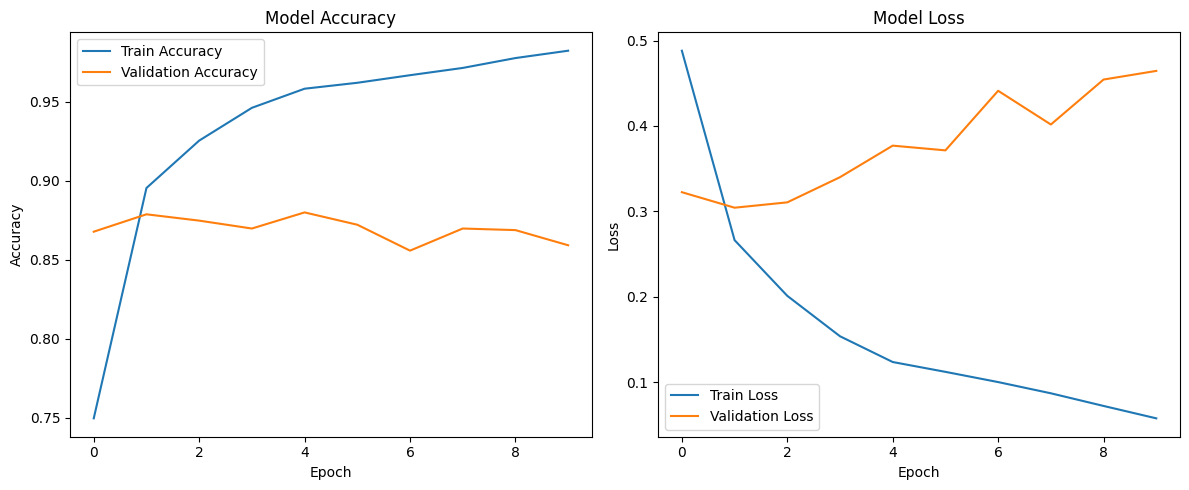

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()